In [1]:
import math
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def rhs(u, ms,g,rho,A,ve,Cd,mp0,mpdot):
    """
    Returns the right-hand side of the phugoid system of equations.
    Returns
    -------
    rhs : numpy.ndarray
        The right-hand side of the system
        as a 1D array of four floats.
    """
    
    h,v,mp = u
    
    rhs = np.array([v,
                    -g+(mpdot*ve)/(ms+mp)-(rho*v*np.abs(v)*A*CD)/(2*(ms+mp)),
                    -mpdot])
    return rhs

In [3]:
def euler_step(u, f, dt, *args):
    """
    Returns the solution at the next time step using Euler's method.
    
    Parameters
    ----------
    u : numpy.ndarray
        Solution at the previous time step
        as a 1D array of floats.
    f : function
        Function to compute the right-hand side of the system.
    dt : float
        Time-step size.
    args : tuple, optional
        Positional arguments to pass to the function f.
    
    Returns
    -------
    u_new : numpy.ndarray
        The solution at the next time step
        as a 1D array of floats.
    """
    u_new = u + dt * f(u, *args)
    return u_new

In [4]:
T = 50  # length of the time interval
dt = 0.1  # time-step size
N = int(T / dt) + 1  # number of time steps

# Set parameters.
ms = 50.0 # weight of the rocket shell (kg)
g = 9.81  # gravitational acceleration (m.s^{-2})
rho = 1.091 #Average density air (kg/m3)
r = 0.5 # radius (m)
A = np.pi*r**2 #Area 
ve = 325.0 # Exhaust speed
CD = 0.15 # Drag coefficient 

#Set initial values
h0 = 0.0
v0 = 0.0
mp0 = 100.0 # Initial weight of rocket propellant kg

mpdot = 20.0 # Flow rate of propellant kg/s

# Create array to store the solution at each time step.
u = np.empty((N, 3))
# Set the initial conditions.
u[0] = np.array([h0, v0, mp0])

# Time integration with Euler's method.
for n in range(N - 1):
    t = dt*n
    
    #While t<5 there is still thrust
    if t<5:
        u[n + 1] = euler_step(u[n], rhs, dt,ms,g,rho,A,ve,CD,mp0,mpdot)
    
    #Once the propellant is out there is no more thrust
    elif t>=5:
        # Propellant flow rate becomes 0
        mpdot = 0
        u[n + 1] = euler_step(u[n], rhs, dt,ms,g,rho,A,ve,CD,mp0,mpdot)
        

  

In [5]:
#Time grid 
t_ = np.linspace(0,T,N)


In [6]:
# Set of variable results to plot
h = u[:,0]
v = u[:,1]
mp = u[:,2]

In [7]:
# Propellant left on the tank at 3.2 sec
mp_index = int(3.2/dt)
print('Mass left: ',mp[mp_index])

Mass left:  36.0


In [8]:
#Maximum velocity
vmax = np.amax(v)
print('Max velocity: {:.2f}'.format(vmax))
vmax_index= np.where(v ==np.amax(v))
#Time at maximum velocity
print('Time at Vmax: {:.2f}'.format(t_[vmax_index[0][0]]))
#Height at maximum velocity
print('Height at Vmax: {:.2f}'.format(h[vmax_index[0][0]]))

Max velocity: 232.11
Time at Vmax: 5.00
Height at Vmax: 523.52


In [9]:
#Maximum altitude achieved
hmax = np.amax(h)
print('Maximum altitude achieved: {:.2f}'.format(hmax))
hmax_index= np.where(h ==np.amax(h))
print('Time at maximum altitude: {:.2f}'.format(t_[hmax_index[0][0]]))


Maximum altitude achieved: 1334.18
Time at maximum altitude: 15.70


In [10]:
#Time at impact
t_impact = np.where(h<0)[0][0]
print('Time at impact: {:.2f}'.format(t_impact))
#Velocity at impact
v_impact = v[t_impact]
print('Velocity at impact: {:.2f}'.format(v_impact))


Time at impact: 371.00
Velocity at impact: -86.01


In [11]:
# Set the font family and size to use for Matplotlib figures.
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 12

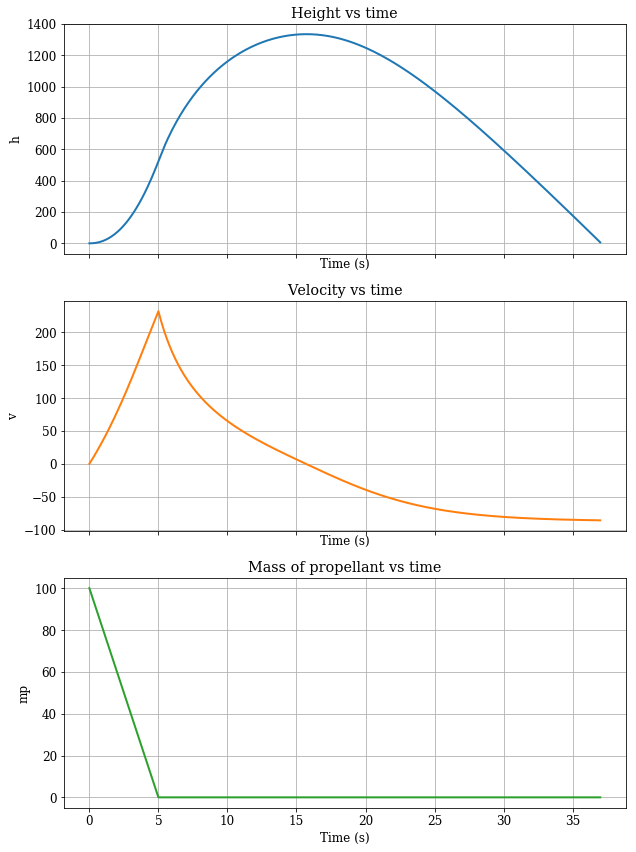

In [12]:
#Plots of all variables of interest

fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, sharex=True)

ax0.set_title('Height vs time')
ax0.set_ylabel('h')
ax0.set_xlabel('Time (s)')
ax0.plot(t_[:t_impact],h[:t_impact], color='C0', linestyle='-', linewidth=2)

ax0.grid()

ax1.set_title('Velocity vs time')
ax1.set_ylabel('v')
ax1.set_xlabel('Time (s)')
ax1.plot(t_[:t_impact],v[:t_impact], color='C1', linestyle='-', linewidth=2)


ax1.grid()


ax2.set_title('Mass of propellant vs time')
ax2.set_ylabel('mp')
ax2.set_xlabel('Time (s)')
ax2.plot(t_[:t_impact],mp[:t_impact], color='C2', linestyle='-', linewidth=2)

ax2.grid()

fig.set_size_inches(9,12)
plt.tight_layout()


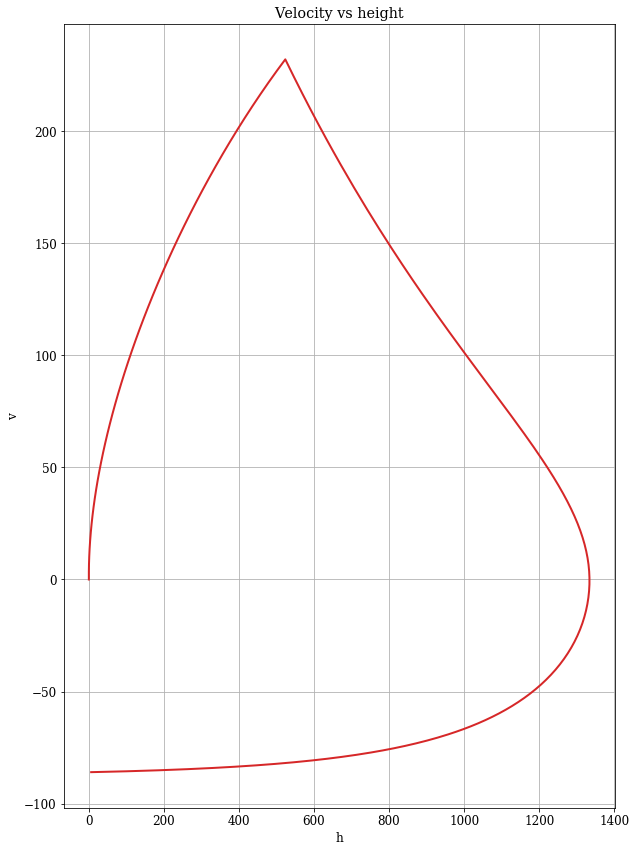

In [13]:
fig,ax3 = plt.subplots(nrows=1, sharex=True)

ax3.set_title('Velocity vs height')
ax3.set_ylabel('v')
ax3.set_xlabel('h')
ax3.plot(h[:t_impact],v[:t_impact], color='C3', linestyle='-', linewidth=2)

ax3.grid()

fig.set_size_inches(9,12)
plt.tight_layout()